# Machine Learning

In [2]:
# importin necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     # visualization libaray
import seaborn as sns       # visualization libaray
from scipy.stats import trim_mean
import wquantiles    # uses to calculate the wighted quantiles
from statsmodels import robust     # for calculateing the mean absolute deviation

C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv("C:\\Users\\gaura\\Downloads\\BostonHousing (1).csv")
df.head(5) # prints fisrt 5 rows of the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.tail(5) # prints last 5 rows of the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


# Data EXploration Techniques
- The shape attribute returs a two-item tuple (number of rows and the number of columns) for the dataframe. For a Series, it return a one-itemtuple.

In [5]:
# check the shape of data
df.shape

(506, 14)

In [6]:
df.to_csv("C:\\Users\\gaura\\OneDrive\\Desktop\\Machine learning\\Data Sets\\BostonHousing.csv")

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.NOX.dtype

dtype('float64')

In [9]:
df.dtypes # check the all type type for all coulmns


CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [10]:
df["NOX"].dtype # check the one coulmns data

dtype('float64')

In [11]:
df.CRIM.dtype

dtype('float64')

# Data Exploration Techniques (Contd.)

- You can use the: operator with start index on left ans end index on right of it to output the correesopnding slice.
    - Sclicing a Data Frame (df) using iloc index

In [12]:
df.iloc[:,1:2]  # Label based slicing

,ZN
0,18.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
501,0.0
502,0.0
503,0.0
504,0.0


In [13]:
df.loc[:,"NOX":"AGE"]

,NOX,RM,AGE
0,0.538,6.575,65.2
1,0.469,6.421,78.9
2,0.469,7.185,61.1
3,0.458,6.998,45.8
4,0.458,7.147,54.2
...,...,...,...
501,0.573,6.593,69.1
502,0.573,6.120,76.7
503,0.573,6.976,91.0
504,0.573,6.794,89.3


In [14]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [15]:
# Statistcal info
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
# Data type info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


 **Using unique () on the cloumns od interest will return a numpy array with unique values of the cloumn.**
- EXtracting all unique values out  of "crim" column:

In [17]:
df["CRIM"].unique()

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02,         nan, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

In [18]:
df.NOX.unique()

array([0.538 , 0.469 , 0.458 , 0.524 , 0.499 , 0.428 , 0.448 , 0.439 ,
       0.41  , 0.403 , 0.411 , 0.453 , 0.4161, 0.398 , 0.409 , 0.413 ,
       0.437 , 0.426 , 0.449 , 0.489 , 0.464 , 0.445 , 0.52  , 0.547 ,
       0.581 , 0.624 , 0.871 , 0.605 , 0.51  , 0.488 , 0.401 , 0.422 ,
       0.404 , 0.415 , 0.55  , 0.507 , 0.504 , 0.431 , 0.392 , 0.394 ,
       0.647 , 0.575 , 0.447 , 0.4429, 0.4   , 0.389 , 0.385 , 0.405 ,
       0.433 , 0.472 , 0.544 , 0.493 , 0.46  , 0.4379, 0.515 , 0.442 ,
       0.518 , 0.484 , 0.429 , 0.435 , 0.77  , 0.718 , 0.631 , 0.668 ,
       0.671 , 0.7   , 0.693 , 0.659 , 0.597 , 0.679 , 0.614 , 0.584 ,
       0.713 , 0.74  , 0.655 , 0.58  , 0.532 , 0.583 , 0.609 , 0.585 ,
       0.573 ])

In [19]:
df.CHAS.unique() # nan missing value oor this cloumn # its Catgorical

array([ 0., nan,  1.])

In [20]:
df.RAD.unique() # its numrical

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

In [21]:
df.TAX.unique()

array([296, 242, 222, 311, 307, 279, 252, 233, 243, 469, 226, 313, 256,
       284, 216, 337, 345, 305, 398, 281, 247, 270, 276, 384, 432, 188,
       437, 403, 193, 265, 255, 329, 402, 348, 224, 277, 300, 330, 315,
       244, 264, 223, 254, 198, 285, 241, 293, 245, 289, 358, 304, 287,
       430, 422, 370, 352, 351, 280, 335, 411, 187, 334, 666, 711, 391,
       273], dtype=int64)

- **Using value () on the column of interest will return a numpy array with all the values of the column.**
- Extracting values out of "CRIM" column:

In [22]:
df["CRIM"].values

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02,         nan, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

In [23]:
df.NOX.values

array([0.538 , 0.469 , 0.469 , 0.458 , 0.458 , 0.458 , 0.524 , 0.524 ,
       0.524 , 0.524 , 0.524 , 0.524 , 0.524 , 0.538 , 0.538 , 0.538 ,
       0.538 , 0.538 , 0.538 , 0.538 , 0.538 , 0.538 , 0.538 , 0.538 ,
       0.538 , 0.538 , 0.538 , 0.538 , 0.538 , 0.538 , 0.538 , 0.538 ,
       0.538 , 0.538 , 0.538 , 0.499 , 0.499 , 0.499 , 0.499 , 0.428 ,
       0.428 , 0.448 , 0.448 , 0.448 , 0.448 , 0.448 , 0.448 , 0.448 ,
       0.448 , 0.448 , 0.439 , 0.439 , 0.439 , 0.439 , 0.41  , 0.403 ,
       0.41  , 0.411 , 0.453 , 0.453 , 0.453 , 0.453 , 0.453 , 0.453 ,
       0.4161, 0.398 , 0.398 , 0.409 , 0.409 , 0.409 , 0.413 , 0.413 ,
       0.413 , 0.413 , 0.437 , 0.437 , 0.437 , 0.437 , 0.437 , 0.437 ,
       0.426 , 0.426 , 0.426 , 0.426 , 0.449 , 0.449 , 0.449 , 0.449 ,
       0.489 , 0.489 , 0.489 , 0.489 , 0.464 , 0.464 , 0.464 , 0.445 ,
       0.445 , 0.445 , 0.445 , 0.445 , 0.52  , 0.52  , 0.52  , 0.52  ,
       0.52  , 0.52  , 0.52  , 0.52  , 0.52  , 0.52  , 0.52  , 0.547 ,
      

In [24]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

- **Using mean() on the data frame will return mean of the data frame across all the column.**

In [25]:
df.mean()

CRIM         3.611874
ZN          11.211934
INDUS       11.083992
CHAS         0.069959
NOX          0.554695
RM           6.284634
AGE         68.518519
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.715432
MEDV        22.532806
dtype: float64

In [26]:
df.NOX.mean()

0.5546950592885376

- **Using median() on the data frame will return meadian values of the data frame across all the columns.**

In [27]:
df.median()

CRIM         0.253715
ZN           0.000000
INDUS        9.690000
CHAS         0.000000
NOX          0.538000
RM           6.208500
AGE         76.800000
DIS          3.207450
RAD          5.000000
TAX        330.000000
PTRATIO     19.050000
B          391.440000
LSTAT       11.430000
MEDV        21.200000
dtype: float64

In [28]:
df.CRIM.median()

0.253715

- **Using mode() on the data frame will return mode values of the data frame across all the columns, row with axis = 0 and axis = repectively.**

In [29]:
df.mode(axis=0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01501,0.0,18.1,0.0,0.538,5.713,100.0,3.4952,24.0,666.0,20.2,396.9,6.36,50.0
1,14.33370,NaN,NaN,NaN,NaN,6.127,NaN,NaN,NaN,NaN,NaN,NaN,7.79,NaN
2,NaN,NaN,NaN,NaN,NaN,6.167,NaN,NaN,NaN,NaN,NaN,NaN,8.05,NaN
3,NaN,NaN,NaN,NaN,NaN,6.229,NaN,NaN,NaN,NaN,NaN,NaN,14.10,NaN
4,NaN,NaN,NaN,NaN,NaN,6.405,NaN,NaN,NaN,NaN,NaN,NaN,18.13,NaN
5,NaN,NaN,NaN,NaN,NaN,6.417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.AGE.mode()

0    100.0
Name: AGE, dtype: float64

In [31]:
df.NOX.mode()

0    0.538
Name: NOX, dtype: float64

In [32]:
df["CRIM"].mode()

0     0.01501
1    14.33370
Name: CRIM, dtype: float64

In [33]:
df.mode(axis=1) # axis 0 is vertical and axis 1 horizontal side .

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.00632,0.538,1.0,2.31,4.09,4.98,6.575,15.3,18.0,24.0,65.2,296.0,396.9
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.fillna

<bound method NDFrame.fillna of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.9

In [35]:
type(np.NaN)

float

In [36]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


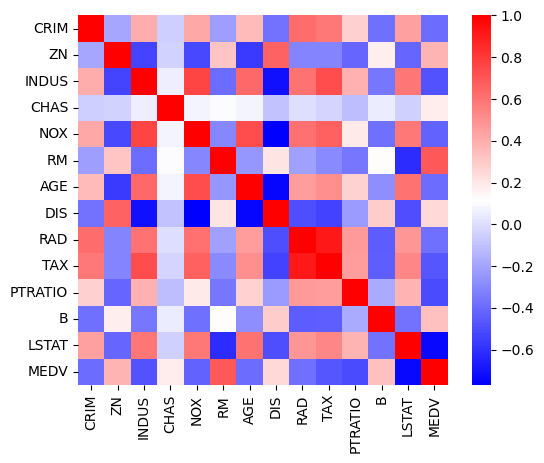

In [37]:
Correlations = df.corr()
sns.heatmap(data = Correlations , square = True ,cmap = "bwr")
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'CRIM'),
  Text(1.5, 0, 'ZN'),
  Text(2.5, 0, 'INDUS'),
  Text(3.5, 0, 'CHAS'),
  Text(4.5, 0, 'NOX'),
  Text(5.5, 0, 'RM'),
  Text(6.5, 0, 'AGE'),
  Text(7.5, 0, 'DIS'),
  Text(8.5, 0, 'RAD'),
  Text(9.5, 0, 'TAX'),
  Text(10.5, 0, 'PTRATIO'),
  Text(11.5, 0, 'B'),
  Text(12.5, 0, 'LSTAT'),
  Text(13.5, 0, 'MEDV')])

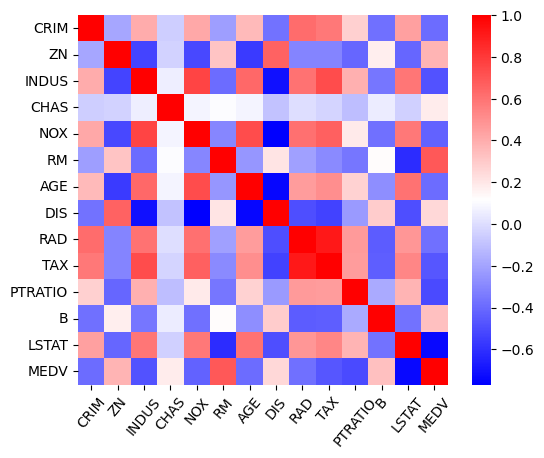

In [38]:
df = pd.read_csv("C:\\Users\\gaura\\Downloads\\BostonHousing (1).csv")
Correlations = df.corr()
sns.heatmap(data = Correlations , square = True ,cmap = "bwr")
plt.yticks(rotation = 0)
plt.xticks(rotation = 50)

# Preprocessing the dataset


In [39]:
# Check for null values
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [40]:
df.shape

(506, 14)

In [41]:
df.isnull().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [42]:
df.shape[0]

506

In [43]:
(df.isnull().sum()/df.shape[0])*100


CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64

In [44]:
df.fillna(False,inplace=True)

C:\Users\gaura\AppData\Local\Temp\ipykernel_4568\3025413718.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna(False,inplace=True)


In [45]:
df.mean()

CRIM         3.469112
ZN          10.768775
INDUS       10.645889
CHAS         0.067194
NOX          0.554695
RM           6.284634
AGE         65.810277
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.212846
MEDV        22.532806
dtype: object

In [46]:
df.fillna(df.mean(),inplace=True)

In [48]:
df.mode()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,0.0,18.1,0.0,0.538,5.713,100.0,3.4952,24.0,666.0,20.2,396.9,False,50.0
1,NaN,NaN,NaN,NaN,NaN,6.127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,6.167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,6.229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,6.405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,6.417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    object 
 1   ZN       506 non-null    object 
 2   INDUS    506 non-null    object 
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    object 
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    object 
 13  MEDV     506 non-null    float64
dtypes: float64(6), int64(2), object(6)
memory usage: 55.5+ KB


In [50]:
from sklearn.impute import SimpleImputer
cols= df.columns
mean_imputer =SimpleImputer(missing_values= np.nan,strategy = "mean")
mean_imputer = mean_imputer.fit(df)
imputed_df = mean_imputer.transform(df.values)
df1 = pd.DataFrame(data= imputed_df,columns = cols)
df1

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,0.00,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,0.00,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [51]:
df1.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [52]:
df1.isnull().sum().sum()

0

In [53]:
# Get the rows with missing values
missing_rows = df[df.isnull().any(axis=1)]
missing_rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [54]:
df[df.isnull().any(axis=1).tolist()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [55]:
df1.isnull().values.any()


False

In [56]:
df[df.isnull()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df.CRIM.unique()

array([0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,
       0.14455, 0.21124, 0.17004, 0.22489, 0.11747, 0.09378, 0.62976,
       0.63796, 0.62739, 1.05393, 0.7842, 0.80271, 0.7258, 1.25179,
       0.85204, 1.23247, 0.98843, 0.75026, 0.84054, 0.67191, 0.95577,
       0.77299, 1.00245, 1.13081, 1.35472, 1.38799, 1.15172, 1.61282,
       0.06417, 0.09744, 0.08014, 0.17505, 0.02763, 0.03359, 0.12744,
       0.1415, 0.15936, 0.12269, 0.17142, 0.18836, 0.22927, 0.25387,
       0.21977, 0.08873, 0.04337, 0.0536, False, 0.0136, 0.01311, 0.02055,
       0.01432, 0.15445, 0.10328, 0.14932, 0.17171, 0.11027, 0.1265,
       0.01951, 0.03584, 0.04379, 0.05789, 0.13554, 0.12816, 0.08826,
       0.15876, 0.09164, 0.19539, 0.07896, 0.09512, 0.10153, 0.08707,
       0.05646, 0.08387, 0.04113, 0.04462, 0.03659, 0.03551, 0.05059,
       0.05735, 0.05188, 0.07151, 0.0566, 0.05302, 0.04684, 0.03932,
       0.04203, 0.02875, 0.04294, 0.12204, 0.11504, 0.12083, 0.08187,
       0.0686, 0.148

IndexError: index 7 is out of bounds for axis 0 with size 7

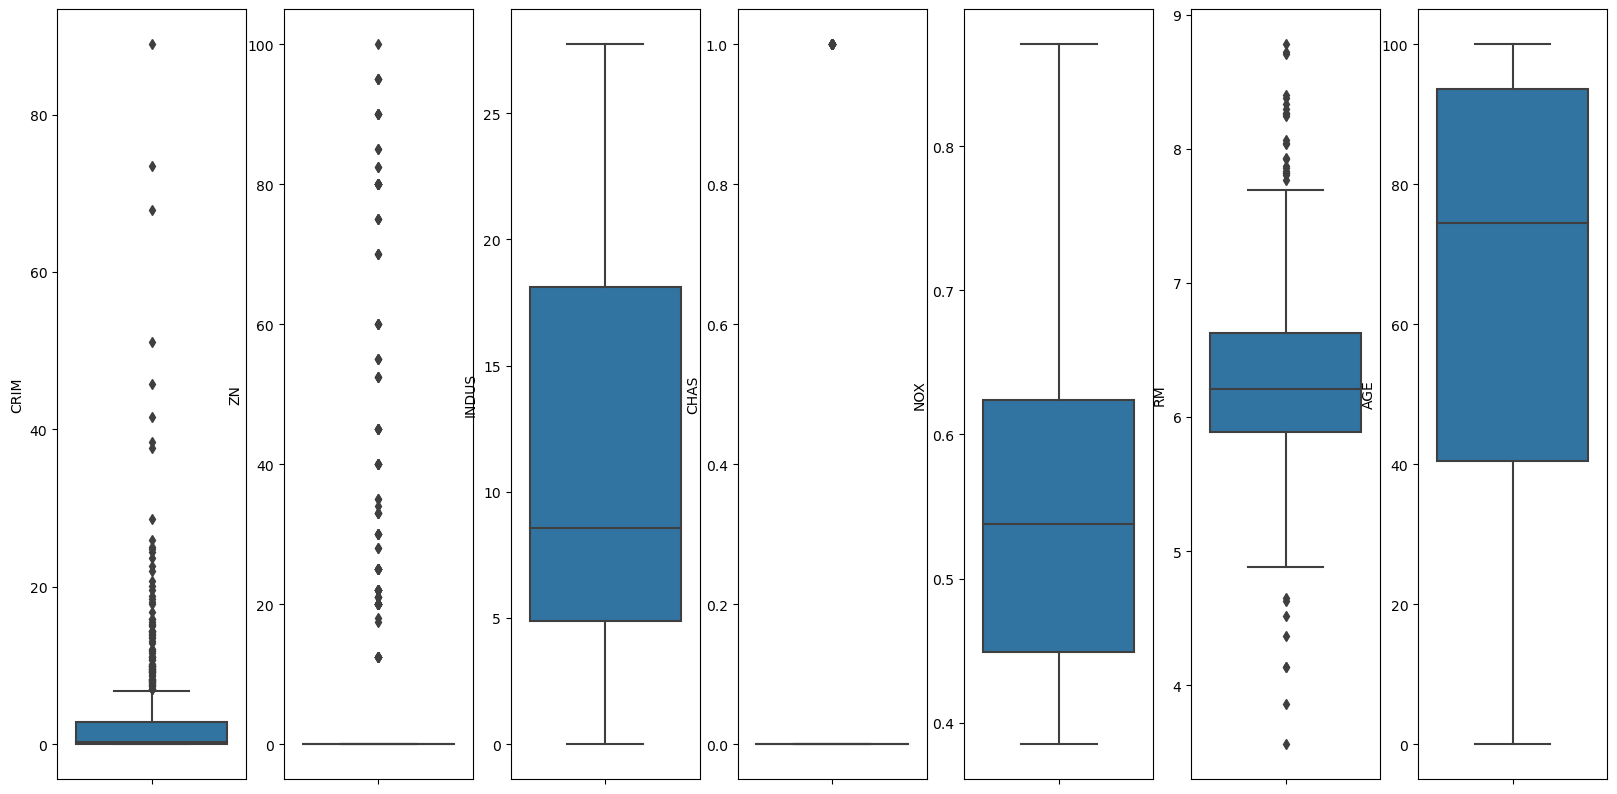

In [58]:
# Expolratory Data Analysis
fig , ax = plt.subplots(ncols=7 , figsize=(20,10))
Index = 0
ax = ax.flatten()
for col,value in df.items():
    sns.boxplot(y = col, data = df, ax=ax[Index])
    Index += 1

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

IndexError: index 8 is out of bounds for axis 0 with size 8

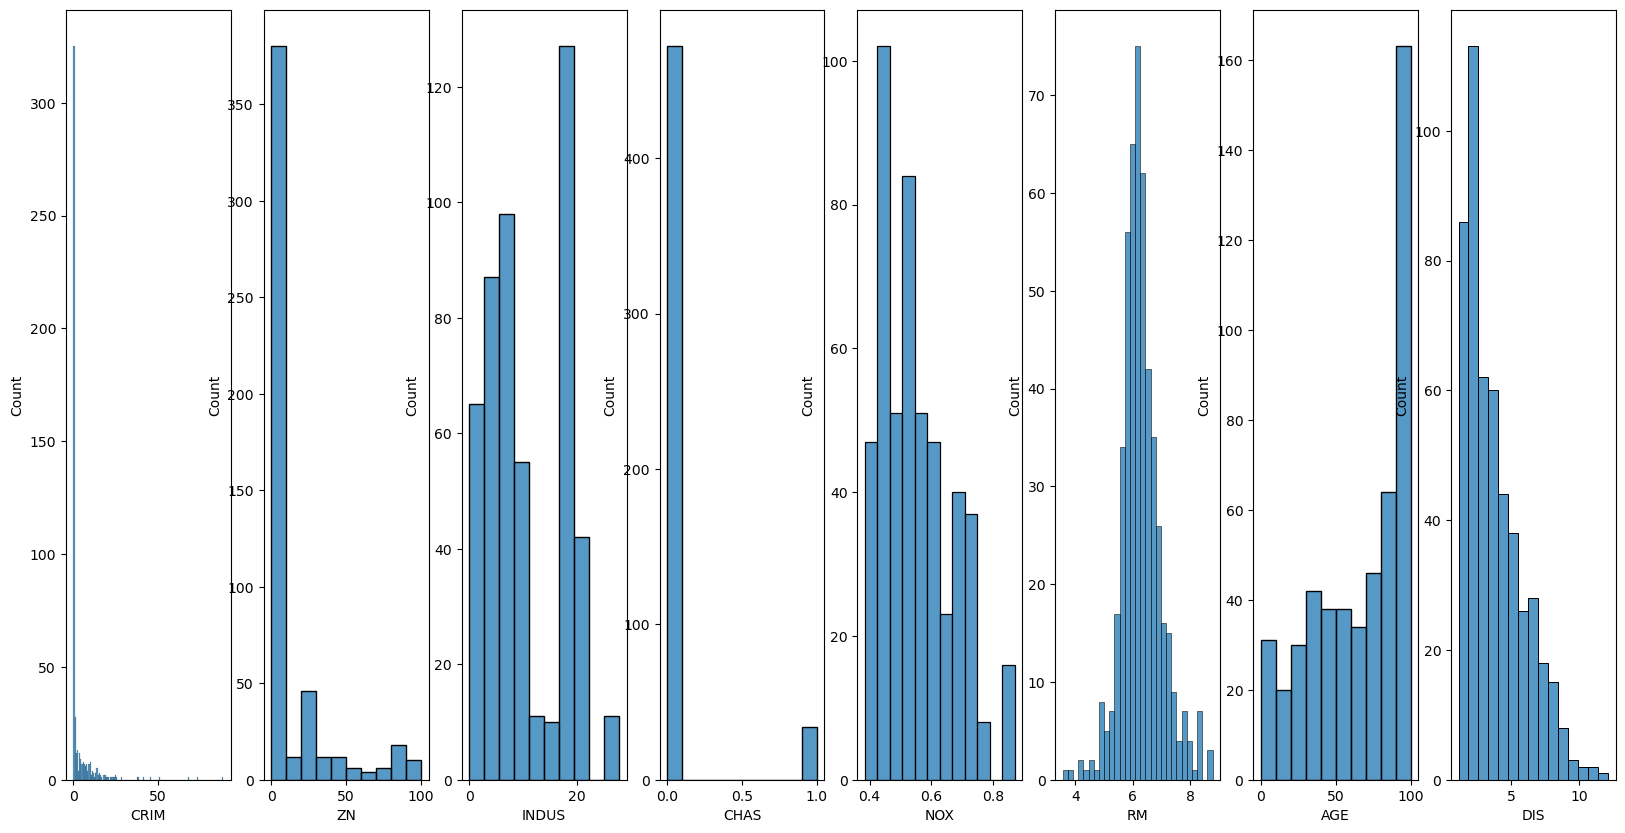

In [63]:
fig , ax = plt.subplots(ncols=8 , figsize=(20,10))
Index = 0
ax = ax.flatten()
for col,value in df.items():
    sns.histplot(value, ax = ax[Index])
    Index += 1